# Even More `pandas`

In [1]:
import pandas as pd
import numpy as np
import requests as rq
from sklearn.preprocessing import OneHotEncoder
from zipfile import ZipFile

## Agenda

SWBAT:

- Use `pandas.set_option()` to adjust display options;
- Use `.pivot()`, `.join()`, `.merge()`, and `pd.concat()` to manipulate DataFrames;
- Perform one-hot-encoding on categorical columns of a DataFrame

We'll work with the Austin Animal Center dataset and with data from King County's Department of Assessments (Seattle housing data).

## `pandas.set_option()`

We can adjust how `pandas` works by setting options in advance.

### Block Scientific Notation

For example, suppose we want to prevent numbers from being displayed in scientific notation.

In [2]:
df = pd.DataFrame([[1e9, 2e9], [3e9, 4e9]])
df

,0,1
0,1.000000e+09,2.000000e+09
1,3.000000e+09,4.000000e+09


Then we can use:

In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
df

,0,1
0,1000000000.00,2000000000.00
1,3000000000.00,4000000000.00


### See More Rows

Or suppose we want `pandas` to show more rows.

In [5]:
df2 = pd.DataFrame(np.array(range(100)))
df2

,0
0,0
1,1
2,2
3,3
4,4
...,...
95,95
96,96
97,97
98,98


In that case we can use:

In [6]:
pd.set_option('display.max_rows', 100)

In [7]:
df2

,0
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


For complete documentation, see [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html).

## Austin Animal Center

In [8]:
data = rq.get('https://data.austintexas.gov/resource/9t4d-g238.json').text

In [9]:
animals = pd.read_json(data)

In [10]:
animals.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,animal_type,sex_upon_outcome,age_upon_outcome,breed,color,outcome_subtype
0,A829154,Ruby,2021-02-08 16:42:00,2021-02-08T16:42:00.000,2015-02-03T00:00:00.000,Adoption,Dog,Spayed Female,6 years,Beagle Mix,Black/Tricolor,NaN
1,A829171,NaN,2021-02-08 16:38:00,2021-02-08T16:38:00.000,2020-08-03T00:00:00.000,Transfer,Cat,Spayed Female,6 months,Domestic Shorthair,Black,Snr
2,A829346,NaN,2021-02-08 16:29:00,2021-02-08T16:29:00.000,2020-02-08T00:00:00.000,Euthanasia,Other,Unknown,NULL,Bat,Brown,Rabies Risk
3,A829309,NaN,2021-02-08 16:08:00,2021-02-08T16:08:00.000,2020-02-08T00:00:00.000,Return to Owner,Dog,Intact Male,1 year,American Pit Bull Terrier Mix,Black/White,NaN
4,A829148,NaN,2021-02-08 16:07:00,2021-02-08T16:07:00.000,2020-12-03T00:00:00.000,Adoption,Dog,Neutered Male,2 months,Pit Bull,Blue/White,NaN


### Reshaping a DataFrame

#### .pivot_table()

Those of you familiar with Excel have probably used Pivot Tables. Pandas has a similar functionality.

Grouping by two different columns can be very helpful.

In [11]:
animals.groupby(by=['outcome_type', 'sex_upon_outcome']).agg(len)

animal_id  name  datetime  monthyear  \
outcome_type    sex_upon_outcome                                         
Adoption        Intact Female             6     6         6          6   
                Intact Male               8     8         8          8   
                Neutered Male           289   289       289        289   
                Spayed Female           229   229       229        229   
                Unknown                   6     6         6          6   
Died            Intact Female             1     1         1          1   
                Intact Male               1     1         1          1   
                Spayed Female             1     1         1          1   
                Unknown                   1     1         1          1   
Disposal        Intact Male               1     1         1          1   
                Unknown                   5     5         5          5   
Euthanasia      Intact Female             5     5         5          5   
                Intact Male               5     5         5          5   
                Neutered Male             4     4         4          4   
                Unknown                  31    31        31         31   
Missing         Intact Male               2     2         2          2   
Return to Owner Intact Female            28    28        28         28   
                Intact Male              38    38        38         38   
                Neutered Male            40    40        40         40   
                Spayed Female            34    34        34         34   
                Unknown                   1     1         1          1   
Rto-Adopt       Neutered Male             9     9         9          9   
                Spayed Female             4     4         4          4   
Transfer        Intact Female            43    43        43         43   
                Intact Male              53    53        53         53   
                Neutered Male            69    69        69         69   
                Spayed Female            66    66        66         66   
                Unknown                  11    11        11         11   

                                  date_of_birth  animal_type  \
outcome_type    sex_upon_outcome                               
Adoption        Intact Female                 6            6   
                Intact Male                   8            8   
                Neutered Male               289          289   
                Spayed Female               229          229   
                Unknown                       6            6   
Died            Intact Female                 1            1   
                Intact Male                   1            1   
                Spayed Female                 1            1   
                Unknown                       1            1   
Disposal        Intact Male                   1            1   
                Unknown                       5            5   
Euthanasia      Intact Female                 5            5   
                Intact Male                   5            5   
                Neutered Male                 4            4   
                Unknown                      31           31   
Missing         Intact Male                   2            2   
Return to Owner Intact Female                28           28   
                Intact Male                  38           38   
                Neutered Male                40           40   
                Spayed Female                34           34   
                Unknown                       1            1   
Rto-Adopt       Neutered Male                 9            9   
                Spayed Female                 4            4   
Transfer        Intact Female                43           43   
                Intact Male                  53           53   
                Neutered Male                69           69   
                Spaye

But it has the unsavory side effect of creating a two-level index. This can be a good time to use `.pivot_table()`.

(There is also a `.pivot()`. For the somewhat subtle differences, see [here](https://stackoverflow.com/questions/30960338/pandas-difference-between-pivot-and-pivot-table-why-is-only-pivot-table-workin).)

In [12]:
animals.pivot_table(index='outcome_type', columns='sex_upon_outcome', aggfunc=len)

age_upon_outcome                                          \
sex_upon_outcome    Intact Female Intact Male Neutered Male Spayed Female   
outcome_type                                                                
Adoption                     6.00        8.00        289.00        229.00   
Died                         1.00        1.00           nan          1.00   
Disposal                      nan        1.00           nan           nan   
Euthanasia                   5.00        5.00          4.00           nan   
Missing                       nan        2.00           nan           nan   
Return to Owner             28.00       38.00         40.00         34.00   
Rto-Adopt                     nan         nan          9.00          4.00   
Transfer                    43.00       53.00         69.00         66.00   

                             animal_id                            \
sex_upon_outcome Unknown Intact Female Intact Male Neutered Male   
outcome_type                                                       
Adoption            6.00          6.00        8.00        289.00   
Died                1.00          1.00        1.00           nan   
Disposal            5.00           nan        1.00           nan   
Euthanasia         31.00          5.00        5.00          4.00   
Missing              nan           nan        2.00           nan   
Return to Owner     1.00         28.00       38.00         40.00   
Rto-Adopt            nan           nan         nan          9.00   
Transfer           11.00         43.00       53.00         69.00   

                                        ...          name              \
sex_upon_outcome Spayed Female Unknown  ... Intact Female Intact Male   
outcome_type                            ...                             
Adoption                229.00    6.00  ...          6.00        8.00   
Died                      1.00    1.00  ...          1.00        1.00   
Disposal                   nan    5.00  ...           nan        1.00   
Euthanasia                 nan   31.00  ...          5.00        5.00   
Missing                    nan     nan  ...           nan        2.00   
Return to Owner          34.00    1.00  ...         28.00       38.00   
Rto-Adopt                 4.00     nan  ...           nan         nan   
Transfer                 66.00   11.00  ...         43.00       53.00   

                                                     outcome_subtype  \
sex_upon_outcome Neutered Male Spayed Female Unknown   Intact Female   
outcome_type                                                           
Adoption                289.00        229.00    6.00            6.00   
Died                       nan          1.00    1.00            1.00   
Disposal                   nan           nan    5.00             nan   
Euthanasia                4.00           nan   31.00            5.00   
Missing                    nan           nan     nan             nan   
Return to Owner          40.00         34.00    1.00           28.00   
Rto-Adopt                 9.00          4.00     nan             nan   
Transfer                 69.00         66.00   11.00           43.00   

                                                                  
sex_upon_outcome Intact Male Neutered Male Spayed Female Unknown  
outcome_type                                                      
Adoption                8.00        289.00        229.00    6.00  
Died                    1.00           nan          1.00    1.00  
Disposal                1.00           nan           nan    5.00  
Euthanasia              5.00          4.00           nan   31.00  
Missing                 2.00           nan           nan     nan  
Return to Owner        38.00         40.00         34.00    1.00  
Rto-Adopt                nan          9.00          4.00     nan  
Transfer               53.00         69.00         66.00   11.00  

[8 rows x 50 columns]

### Methods for Combining DataFrames: .join(), .merge(), .concat(), .melt()

#### .join()

In [13]:
toy1 = pd.DataFrame([[63, 142], [33, 47]], columns=['age', 'HP'])
toy2 = pd.DataFrame([[63, 100], [33, 200]], columns=['age', 'MP'])

toy1

,age,HP
0,63,142
1,33,47


In [14]:
toy2

,age,MP
0,63,100
1,33,200


In [15]:
toy1.set_index('age').join(toy2.set_index('age'))

,HP,MP
age,,
63,142,100
33,47,200


For more on this method, check out the [doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html)!

#### .merge()

In [16]:
ds_chars = pd.read_csv('data/ds_chars.csv', index_col=0)
ds_chars

,name,HP,home_state
0,greg,200,WA
1,miles,200,WA
2,alan,170,TX
3,alison,300,DC
4,rachel,200,TX


In [17]:
states = pd.read_csv('data/states.csv', index_col=0)
states

,state,nickname,capital
0,WA,evergreen,Olympia
1,TX,alamo,Austin
2,DC,district,Washington
3,OH,buckeye,Columbus
4,OR,beaver,Salem


In [18]:
ds_chars.merge(states,
               left_on='home_state',
               right_on='state',
               how='inner')

,name,HP,home_state,state,nickname,capital
0,greg,200,WA,WA,evergreen,Olympia
1,miles,200,WA,WA,evergreen,Olympia
2,alan,170,TX,TX,alamo,Austin
3,rachel,200,TX,TX,alamo,Austin
4,alison,300,DC,DC,district,Washington


In [19]:
ds_chars.merge(states,
               left_on='home_state',
               right_on='state',
               how='outer')

,name,HP,home_state,state,nickname,capital
0,greg,200.00,WA,WA,evergreen,Olympia
1,miles,200.00,WA,WA,evergreen,Olympia
2,alan,170.00,TX,TX,alamo,Austin
3,rachel,200.00,TX,TX,alamo,Austin
4,alison,300.00,DC,DC,district,Washington
5,NaN,nan,NaN,OH,buckeye,Columbus
6,NaN,nan,NaN,OR,beaver,Salem


#### pd.concat()

This method takes a *list* of pandas objects as arguments.

In [20]:
ds_full = pd.concat([ds_chars, states])
ds_full

,name,HP,home_state,state,nickname,capital
0,greg,200.00,WA,NaN,NaN,NaN
1,miles,200.00,WA,NaN,NaN,NaN
2,alan,170.00,TX,NaN,NaN,NaN
3,alison,300.00,DC,NaN,NaN,NaN
4,rachel,200.00,TX,NaN,NaN,NaN
0,NaN,nan,NaN,WA,evergreen,Olympia
1,NaN,nan,NaN,TX,alamo,Austin
2,NaN,nan,NaN,DC,district,Washington
3,NaN,nan,NaN,OH,buckeye,Columbus
4,NaN,nan,NaN,OR,beaver,Salem


`pd.concat()`––and many other pandas operations––make use of an `axis` parameter. For this particular method I need to specify whether I want to concatenate the DataFrames *row-wise* (`axis=0`) or *column-wise* (`axis=1`). The default is `axis=0`, so let's override that!

In [21]:
ds_full = pd.concat([ds_chars, states], axis=1)
ds_full

,name,HP,home_state,state,nickname,capital
0,greg,200,WA,WA,evergreen,Olympia
1,miles,200,WA,TX,alamo,Austin
2,alan,170,TX,DC,district,Washington
3,alison,300,DC,OH,buckeye,Columbus
4,rachel,200,TX,OR,beaver,Salem


#### pd.melt()

Melting removes the structure from your DataFrame and puts the data in a 'variable' and 'value' format.

In [22]:
pd.melt(ds_full)

,variable,value
0,name,greg
1,name,miles
2,name,alan
3,name,alison
4,name,rachel
5,HP,200
6,HP,200
7,HP,170
8,HP,300
9,HP,200


[Here](https://towardsdatascience.com/transforming-data-in-python-with-pandas-melt-854221daf507) is a use case for `pd.melt()`.

> This is another way to get dummies

## Making Use of Categories: One-Hot Encoding

Pandas has a one-hot encoder called `get_dummies()`, which is good for exploratory data analysis (EDA).

This might be good to use if we're in the **data-understanding** stage (Stage 2) of our CRISP-DM process.

We can call it on a DataFrame as a whole or on a Series (column).

In [23]:
pd.get_dummies(animals['animal_type'])

,Bird,Cat,Dog,Other
0,0,0,1,0
1,0,1,0,0
2,0,0,0,1
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
995,0,0,1,0
996,0,0,1,0
997,0,1,0,0
998,0,0,1,0


If however we're in a later stage of the process and we're interested, say, in preparing a data pipeline, `pandas.get_dummies()` will prove inferior to other tools.

In practice, we will **not** use `pandas.get_dummies()`. The library Scikit-Learn (`sklearn`, included with your Anaconda installation) has a `OneHotEncoder` class that creates an object that persists. This makes it much more apt for production environments, and so it's good to get in the habit of using it.

Ultimately, we will use **many** tools from `sklearn`.

In [24]:
ohe = OneHotEncoder()

ohe.fit(animals[['animal_type']])

OneHotEncoder()

Now that the `OneHotEncoder` object has been fitted to our data, it has newly available attributes and methods. In particular, it has access to the different categories that we're replacing:

In [25]:
ohe.get_feature_names()

array(['x0_Bird', 'x0_Cat', 'x0_Dog', 'x0_Other'], dtype=object)

We'll have much more to say about `sklearn` syntax and about Python's object structure. But let's now transform our data to see what the new table looks like:

In [26]:
ohe.transform(animals[['animal_type']])

<1000x4 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

For the sake of saving storage space, the return is a **sparse matrix**, but we can "re-inflate it if we want to see it in tabular form:

In [27]:
types_encoded = ohe.transform(animals[['animal_type']]).todense()
types_encoded

matrix([[0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        ...,
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.]])

Let's put it into a DataFrame:

In [28]:
pd.DataFrame(types_encoded, columns=ohe.get_feature_names()).head()

,x0_Bird,x0_Cat,x0_Dog,x0_Other
0,0.00,0.00,1.00,0.00
1,0.00,1.00,0.00,0.00
2,0.00,0.00,0.00,1.00
3,0.00,0.00,1.00,0.00
4,0.00,0.00,1.00,0.00


## King County Assessments

As data scientists, we want to build a model to predict the sale price of a house in Seattle in 2019, based on its square footage. We know that the King County Department of Assessments has comprehensive data available on real property sales in the Seattle area. We need to prepare the data.

### First, get the data!

Go [here](https://info.kingcounty.gov/assessor/DataDownload/default.aspx) and download two files: "Real Property Sales" and "Residential Building". Then unzip them. (Or you can run the cells below if you prefer.)

In [29]:
%%bash
cd data
curl -o property_sales.zip https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  125M  100  125M    0     0   526k      0  0:04:03  0:04:03 --:--:--  539k


In [30]:
%%bash
cd data
curl -o res_bldg.zip https://aqua.kingcounty.gov/extranet/assessor/Residential%20Building.zip 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.6M  100 23.6M    0     0   549k      0  0:00:44  0:00:44 --:--:--  585k


In [31]:
zf = ZipFile('data/property_sales.zip', 'r')
zf.extractall('data')
zf.close()

In [32]:
# zf = ZipFile('data/res_bldg.zip', 'r')
# zf.extractall('data')
# zf.close()

In [38]:
# You'll need to use a new encoding here. List of
# all encodings here:
# https://docs.python.org/3/library/codecs.html#standard-encodings

sales_df = pd.read_csv('/Users/zachgreenberg/Documents/Flatiron/nyc-dc-ds-020121/Phase_1/Pandas/ds-pandas3-main/data/EXTR_RPSale.csv',
                       encoding='mac_roman')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Seeing pink? Warnings are useful!

Note the warning above: `DtypeWarning: Columns (1, 2) have mixed types.` Because we start with an index of zero, the columns that we're being warned about are actually the _second_ and _third_ columns, `sales_df['Major']` and `sales_df['Minor']`.

In [39]:
sales_df.head().T

,0,1,2,3,4
ExciseTaxNbr,2687551,3080093,1235111,2704079,2584094
Major,138860,82204,664885,423943,403700
Minor,110,9037,40,50,715
DocumentDate,08/21/2014,10/27/2020,07/09/1991,10/11/2014,01/04/2013
SalePrice,245000,0,0,0,0
RecordingNbr,20140828001436,20201102000765,199203161090,20141205000558,20130110000910
Volume,,,071,,
Page,,,001,,
PlatNbr,,,664885,,
PlatType,,,C,,


### Data overload?

That's a lot of columns. We're only interested in identifying the date, sale price, and square footage of each specific property. What can we do?

In [40]:
sales_df = sales_df[['Major', 'Minor', 'DocumentDate', 'SalePrice']]

In [41]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137079 entries, 0 to 2137078
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Major         object
 1   Minor         object
 2   DocumentDate  object
 3   SalePrice     int64 
dtypes: int64(1), object(3)
memory usage: 65.2+ MB


In [45]:
bldg_df = pd.read_csv('/Users/zachgreenberg/Documents/Flatiron/nyc-dc-ds-020121/Phase_1/Pandas/ds-pandas3-main/data/EXTR_ResBldg.csv')

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Another warning! Which column has index 11?

In [46]:
bldg_df.columns[11]

'ZipCode'

`ZipCode` seems like a potentially useful column. We'll need it to determine which house sales took place in Seattle.

In [47]:
bldg_df.head().T

,0,1,2,3,4
Major,8700,8700,8700,8700,8800
Minor,186,188,245,325,44
BldgNbr,1,1,1,1,1
NbrLivingUnits,1,1,1,1,1
Address,16815 106TH AVE SE 98055,16839 106TH AVE SE 98055,16816 106TH AVE SE 98055,16801 108TH AVE SE 98055,16031 114TH AVE SE 98055
BuildingNumber,16815,16839,16816,16801,16031
Fraction,,,,,
DirectionPrefix,,,,,
StreetName,106TH,106TH,106TH,108TH,114TH
StreetType,AVE,AVE,AVE,AVE,AVE


### So many features!

As data scientists, we should be _very_ cautious about discarding potentially useful data. But, today, we're interested in _only_ the total square footage of each property. What can we do?


In [48]:
bldg_df = bldg_df[['Major', 'Minor', 'SqFtTotLiving', 'ZipCode']]

In [49]:
bldg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518339 entries, 0 to 518338
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Major          518339 non-null  int64 
 1   Minor          518339 non-null  int64 
 2   SqFtTotLiving  518339 non-null  int64 
 3   ZipCode        470196 non-null  object
dtypes: int64(3), object(1)
memory usage: 15.8+ MB


In [50]:
sales_data = pd.merge(sales_df, bldg_df, on=['Major', 'Minor'])

In [51]:
sales_data.head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
0,138860,110,08/21/2014,245000,1490,98002
1,138860,110,06/12/1989,109300,1490,98002
2,138860,110,01/16/2005,14684,1490,98002
3,138860,110,06/08/2005,0,1490,98002
4,82204,9037,10/27/2020,0,3611,98188


In [52]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1484059 entries, 0 to 1484058
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Major          1484059 non-null  object
 1   Minor          1484059 non-null  object
 2   DocumentDate   1484059 non-null  object
 3   SalePrice      1484059 non-null  int64 
 4   SqFtTotLiving  1484059 non-null  int64 
 5   ZipCode        1354480 non-null  object
dtypes: int64(2), object(4)
memory usage: 79.3+ MB


We can see right away that we're missing zip codes for many of the sales transactions.

In [53]:
sales_data.loc[sales_data['ZipCode'].isna()].head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
39,858140,376,05/22/2012,0,900,NaN
40,858140,376,11/28/2017,0,900,NaN
61,785996,270,05/27/2004,5518000,2720,NaN
62,785996,270,10/21/2009,410000,2720,NaN
63,785996,270,03/02/2005,434763,2720,NaN


Because we are interested in finding houses in Seattle ZIP codes, we will need to drop the rows with missing zip codes.

In [54]:
sales_data = sales_data.loc[~sales_data['ZipCode'].isna(), :]

sales_data.head()

,Major,Minor,DocumentDate,SalePrice,SqFtTotLiving,ZipCode
0,138860,110,08/21/2014,245000,1490,98002
1,138860,110,06/12/1989,109300,1490,98002
2,138860,110,01/16/2005,14684,1490,98002
3,138860,110,06/08/2005,0,1490,98002
4,82204,9037,10/27/2020,0,3611,98188


## Time Permitting: Data Cleaning with Pandas

### 1. Investigate and drop rows with invalid values in the SalePrice and SqFtTotLiving columns.

Use multiple notebook cells to accomplish this! Press `[esc]` then `B` to create a new cell below the current cell. Press `[return]` to start typing in the new cell.

<AxesSubplot:ylabel='Frequency'>

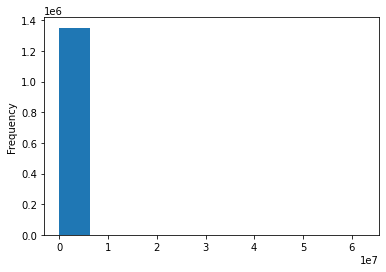

In [55]:
sales_data['SalePrice'].plot(kind='hist')

### 2. Investigate and handle non-numeric ZipCode values

Can you find a way to shorten ZIP+4 codes to the first five digits?

What's the right thing to do with missing values?

In [ ]:
# Read the error message and decide how to fix it.
# Note: using errors='coerce' is the *wrong* choice in this case.
def is_integer(x):
    try:
        _ = int(x)
    except ValueError:
        return False
    return True

sales_data.loc[sales_data['ZipCode'].apply(is_integer) == False, 'ZipCode'].head()

### 3. Add a column for PricePerSqFt



### 4. Subset the data to 2020 sales only.

We can assume that the DocumentDate is approximately the sale date.

### 5. Subset the data to zip codes within the City of Seattle.

You'll need to find a list of Seattle zip codes!

### 6. What is the mean price per square foot for a house sold in Seattle in 2020?

Don't just type the answer. Type code that generates the answer as output!